In [90]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='7356',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/SANDY/Desktop/DATA ANALYSIS FILES - JULY 2024\PROJECT 1- USING SQL AND PYTHON'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

<>:26: SyntaxWarning: invalid escape sequence '\P'
<>:26: SyntaxWarning: invalid escape sequence '\P'
C:\Users\SANDY\AppData\Local\Temp\ipykernel_3860\3775692567.py:26: SyntaxWarning: invalid escape sequence '\P'
  folder_path = 'C:/Users/SANDY/Desktop/DATA ANALYSIS FILES - JULY 2024\PROJECT 1- USING SQL AND PYTHON'


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector

db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="7356",
                           database="ecommerce")

cur=db.cursor()

In [3]:
query="""select distinct customer_city
            from customers"""

cur.execute(query)

dataset=cur.fetchall()
dataset
#df=pd.DataFrame(dataset)
#df.head()

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [18]:
query="""select count(order_id)
        from orders
        where year(order_purchase_timestamp)=2017"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
"Total order placed in year 2017 are: ",dataset[0][0]

('Total order placed in year 2017 are: ', 135303)

In [25]:
query="""select products.product_category CATEGORY, round(sum(payments.payment_value),2) SALES
from products
join order_items
on products.product_id = order_items.product_id
join payments
on order_items.order_id = payments.order_id
group by CATEGORY"""
cur.execute(query)
dataset=cur.fetchall()
dataset
#df=pd.DataFrame(dataset,columns=["CATEGORY","SALES"])
#df.head()

,CATEGORY,SALES
0,perfumery,4560647.94
1,Furniture Decoration,12871587.53
2,telephony,4381938.46
3,bed table bath,15412983.04
4,automotive,7670648.98


In [26]:
query="""select upper(products.product_category) CATEGORY, round(sum(payments.payment_value),2) SALES
from products
join order_items
on products.product_id = order_items.product_id
join payments
on order_items.order_id = payments.order_id
group by CATEGORY"""
cur.execute(query)
dataset=cur.fetchall()
dataset
#df=pd.DataFrame(dataset,columns=["CATEGORY","SALES"])
#df.head()

[('PERFUMERY', 4560647.94),
 ('FURNITURE DECORATION', 12871587.53),
 ('TELEPHONY', 4381938.46),
 ('BED TABLE BATH', 15412983.04),
 ('AUTOMOTIVE', 7670648.98),
 ('COMPUTER ACCESSORIES', 14267974.02),
 ('HOUSEWARES', 9852823.17),
 ('BABIES', 4858610.94),
 ('TOYS', 5571339.21),
 ('FURNITURE OFFICE', 5821438.38),
 ('COOL STUFF', 7017282.0),
 ('HEALTH BEAUTY', 14916358.07),
 ('PET SHOP', 2801420.73),
 ('GENERAL INTEREST BOOKS', 582252.84),
 ('STATIONARY STORE', 2856960.63),
 ('WATCHES PRESENT', 12862950.11),
 ('PCS', 2512093.94),
 ('CLIMATIZATION', 820535.94),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 2173280.67),
 ('SPORT LEISURE', 12529148.03),
 ('BAGS ACCESSORIES', 1684361.61),
 ('ELECTRONICS', 2338713.9),
 ('CASA CONSTRUCAO', 1229807.61),
 ('GAMES CONSOLES', 1759323.41),
 ('FASHION BAGS AND ACCESSORIES', 1963424.52),
 ('HOME APPLIANCES', 859790.43),
 ('GARDEN TOOLS', 7544526.76),
 ('AGRO INDUSTRIA E COMERCIO', 1068575.49),
 (None, 2275215.39),
 ('AUDIO', 542921.58),
 ('TECHNICAL BOOKS', 2242

In [30]:
query="""select sum(case
			when payment_installments>0
			then 1
            else 0
            end) / count(*)*100
from ecommerce.payments;"""
cur.execute(query)
dataset=cur.fetchall()
"% of orders that were paid in installments: ", dataset
#df=pd.DataFrame(dataset)
#df

('% of orders that were paid in installments: ', [(Decimal('99.9981'),)])

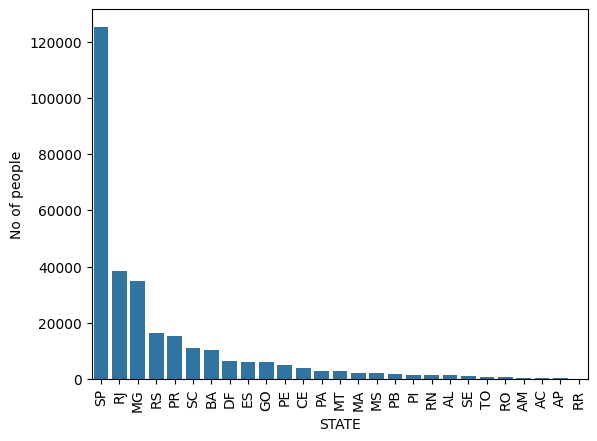

In [61]:
query="""select count(customer_id), customer_state
from ecommerce.customers
group by customer_state"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(dataset,columns=["No of people","STATE"])
#df
df=df.sort_values(by="No of people", ascending=False)
sns.barplot(data=df,x="STATE",y="No of people")
plt.xticks(rotation=90)
plt.show()

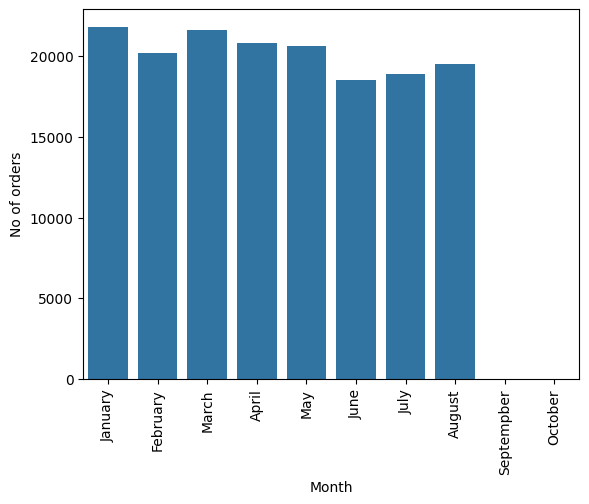

In [68]:
#Calculate the number of orders per month in 2018
query="""select monthname(order_purchase_timestamp), count(order_id)
from ecommerce.orders
where year(order_purchase_timestamp)=2018
group by monthname(order_purchase_timestamp)"""
cur.execute(query)
dataset=cur.fetchall()
"No of order for all months in 2018 are: ",dataset
df=pd.DataFrame(dataset,columns=["Month","No of orders"])
#df
o=["January","February","March","April","May","June","July","August","Septempber","October"]
sns.barplot(data=df, x=df["Month"], y=df["No of orders"], order=o)
plt.xticks(rotation=90)
plt.show()


In [76]:
#Find the average number of products per order, grouped by customer city
query="""with count_per_order as (
select orders.order_id, orders.customer_id, count(order_items.order_item_id) as oc
from ecommerce.orders
join ecommerce.order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select upper(customers.customer_city), round(avg(count_per_order.oc),2)
from ecommerce.customers
join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by avg(count_per_order.oc) desc"""
cur.execute(query)
dataset=cur.fetchall()
#"Avg no of orders city wise are: ",dataset
df=pd.DataFrame(dataset,columns=["CITY","Avg Order"])
df

,CITY,Avg Order
0,PADRE CARVALHO,21.00
1,CELSO RAMOS,19.50
2,DATAS,18.00
3,CANDIDO GODOI,18.00
4,MATIAS OLIMPIO,15.00
...,...,...
4105,TUIUTI,3.00
4106,TIBAU DO SUL,3.00
4107,SAO MAMEDE,3.00
4108,SAMBAIBA,3.00


In [80]:
#Calculate the percentage of total revenue contributed by each product category
query="""select upper(products.product_category) CATEGORY, 
round((sum(payments.payment_value)/(select sum(payments.payment_value) from  ecommerce.payments))*100,2) SALES
from ecommerce.products
join ecommerce.order_items
on products.product_id = order_items.product_id
join ecommerce.payments
on order_items.order_id = payments.order_id
group by CATEGORY
order by SALES desc"""
cur.execute(query)
dataset=cur.fetchall()
"% of total revenue according to product categories: ",dataset
#df=pd.DataFrame(dataset,columns=["Avg Order","CITY"])
#df

('% of total revenue according to product categories: ',
 [('BED TABLE BATH', 32.09),
  ('HEALTH BEAUTY', 31.06),
  ('COMPUTER ACCESSORIES', 29.71),
  ('FURNITURE DECORATION', 26.8),
  ('WATCHES PRESENT', 26.78),
  ('SPORT LEISURE', 26.09),
  ('HOUSEWARES', 20.52),
  ('AUTOMOTIVE', 15.97),
  ('GARDEN TOOLS', 15.71),
  ('COOL STUFF', 14.61),
  ('FURNITURE OFFICE', 12.12),
  ('TOYS', 11.6),
  ('BABIES', 10.12),
  ('PERFUMERY', 9.5),
  ('TELEPHONY', 9.12),
  ('STATIONARY STORE', 5.95),
  ('PET SHOP', 5.83),
  ('PCS', 5.23),
  ('ELECTRONICS', 4.87),
  (None, 4.74),
  ('CONSTRUCTION TOOLS CONSTRUCTION', 4.53),
  ('MUSICAL INSTRUMENTS', 4.37),
  ('ELECTROSTILE', 4.23),
  ('FASHION BAGS AND ACCESSORIES', 4.09),
  ('FIXED TELEPHONY', 3.88),
  ('GAMES CONSOLES', 3.66),
  ('BAGS ACCESSORIES', 3.51),
  ('CASA CONSTRUCAO', 2.56),
  ('ROOM FURNITURE', 2.55),
  ('ELECTRICES 2', 2.33),
  ('AGRO INDUSTRIA E COMERCIO', 2.22),
  ('HOME APPLIANCES', 1.79),
  ('CLIMATIZATION', 1.71),
  ('HOUSE COMFORT', 1

In [97]:
#Identify the correlation between product price and the number of times a product has been purchased.
query="""select upper(products.product_category) CATEGORY, 
count(order_items.order_id) ORDERS_PER_CATEGORY,
avg(order_items.price) PRICE_PER_CATEGORY
from ecommerce.products
join ecommerce.order_items
on products.product_id = order_items.product_id
group by CATEGORY
order by PRICE_PER_CATEGORY desc"""
cur.execute(query)
dataset=cur.fetchall()
#"Correlation between product price and the number of times a product has been purchased: ",dataset
df=pd.DataFrame(dataset,columns=["CATEGORY","ORDERS_PER_CATEGORY","PRICE_PER_CATEGORY"])
#df

arr1=df["ORDERS_PER_CATEGORY"]
arr2=df["PRICE_PER_CATEGORY"]
a=np.corrcoef([arr1,arr2])
print(a)
print("The required correlation is: ",a[0][1])

[[ 1.         -0.10631552]
 [-0.10631552  1.        ]]
The required correlation is:  -0.10631552237549526


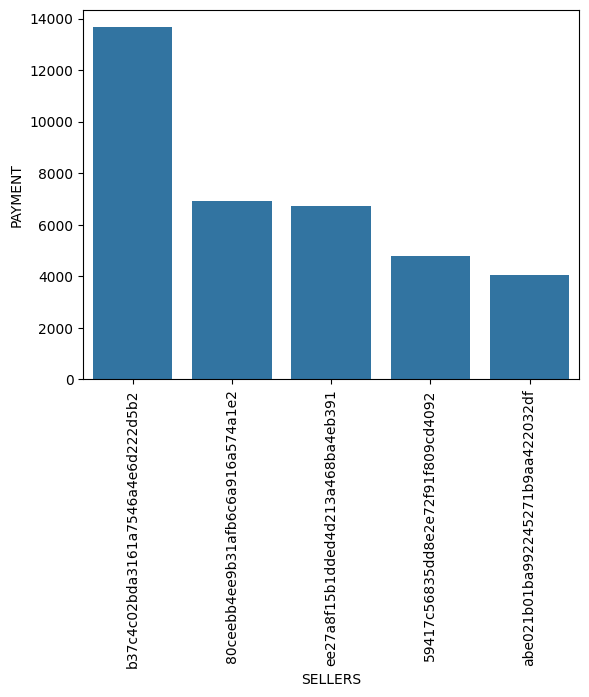

In [106]:
#Calculate the total revenue generated by each seller, and rank them by revenue.
query2="""SET sql_mode=(SELECT REPLACE(@@sql_mode,'ONLY_FULL_GROUP_BY',''))"""
cur.execute(query2)

query="""select *, dense_rank() over (order by PAYMENT desc) RANKS
from
(select order_items.seller_id SELLERS, payments.payment_value PAYMENT
from ecommerce.order_items
join ecommerce.payments
on order_items.order_id = payments.order_id
group by SELLERS) 
as OVERALL_TABLE"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(dataset,columns=["SELLERS","PAYMENT","RANKS"])
#df
sns.barplot(data=df.head(5),x="SELLERS",y="PAYMENT")
plt.xticks(rotation=90)
plt.show()

In [109]:
#Calculate the moving average of order values for each customer over their order history.
#query2="""SET sql_mode=(SELECT REPLACE(@@sql_mode,'ONLY_FULL_GROUP_BY',''))"""
#cur.execute(query2)

query="""select CUST_ID, TIMES, PAYMENT,
avg(PAYMENT) over (partition by CUST_ID
order by TIMES rows between 2 preceding and current row) as MA
from
(select orders.customer_id CUST_ID, orders.order_purchase_timestamp TIMES,
payments.payment_value PAYMENT
from ecommerce.orders
join ecommerce.payments
on orders.order_id = payments.order_id) AS A"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(dataset,columns=["CUST_ID","TIMES","PAYMENT","MA"])
df.head(5)

,CUST_ID,TIMES,PAYMENT,MA
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998


In [112]:
#Calculate the cumulative sales per month for each year.
#query2="""SET sql_mode=(SELECT REPLACE(@@sql_mode,'ONLY_FULL_GROUP_BY',''))"""
#cur.execute(query2)

query="""select YEARS, MONTHS_NUMBER, MONTHS_NAME, REVENUE, round(sum(REVENUE)
over (order by YEARS, MONTHS_NUMBER),2) as CUM_REVENUE
from
(select year(orders.order_purchase_timestamp) YEARS,
month(orders.order_purchase_timestamp) MONTHS_NUMBER,
monthname(orders.order_purchase_timestamp) MONTHS_NAME,
round(sum(payments.payment_value),2) REVENUE
from ecommerce.payments
join ecommerce.orders
on payments.order_id = orders.order_id
group by YEARS, MONTHS_NAME
order by YEARS, MONTHS_NUMBER asc) as A"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(data=dataset, columns=["YEARS","MONTHS_NUMBER","MONTHS_NAME","REVENUE","CUM_REVENUE"])
df.head(5)

,YEARS,MONTHS_NUMBER,MONTHS_NAME,REVENUE,CUM_REVENUE
0,2016,9,September,4035.84,4035.84
1,2016,10,October,945447.68,949483.52
2,2016,12,December,313.92,949797.44
3,2017,1,January,2215808.64,3165606.08
4,2017,2,February,4670528.15,7836134.23


In [120]:
#Calculate the year-over-year growth rate of total sales.

query="""with c as (with b as (select year(orders.order_purchase_timestamp) YEARS, 
sum(payments.payment_value) REVENUE
from ecommerce.orders
join ecommerce.payments
on orders.order_id = payments.order_id
group by YEARS
order by YEARS asc)
select YEARS, REVENUE, lag(REVENUE,1) over (order by YEARS asc) PREVIOUS_YEAR_REVENUE
from b)
select YEARS, round(REVENUE,2), round(PREVIOUS_YEAR_REVENUE,2), 
round(((REVENUE-PREVIOUS_YEAR_REVENUE)/PREVIOUS_YEAR_REVENUE)*100,2) YoY_GROWTH_RATE
from c"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(data=dataset,columns=["YEARS","REVENUE","PREVIOUS_YEAR_REVENUE","YoY_GROWTH_RATE"])
df

,YEARS,REVENUE,PREVIOUS_YEAR_REVENUE,YoY_GROWTH_RATE
0,2016,9.497974e+05,NaN,NaN
1,2017,1.159959e+08,9.497974e+05,12112.7
2,2018,1.391962e+08,1.159959e+08,20.0


In [123]:
#Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

query="""with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) FIRST_ORDER_TIME
from ecommerce.customers
join ecommerce.orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) DISTINCT_ORDERS
from a
join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > FIRST_ORDER_TIME
and orders.order_purchase_timestamp < date_add(FIRST_ORDER_TIME, interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id)) PERCENTAGE
from a
left join b
on a.customer_id = b.customer_id"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(data=dataset,columns=["PERCENTAGE"])
"% of customer retention is: ",df

('% of customer retention is: ',
   PERCENTAGE
 0       None)

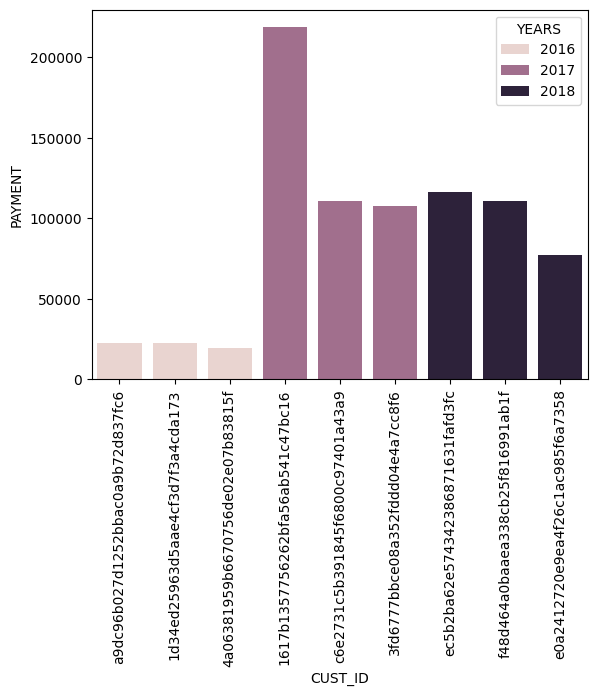

In [4]:
#Identify the top 3 customers who spent the most money in each year.

query="""select YEARS, CUST_ID, PAYMENT, RANKS
from
(select *, dense_rank() over (partition by YEARS order by PAYMENT desc) RANKS
from
(select year(orders.order_purchase_timestamp) YEARS,
#orders.order_id ORDER_ID,
 orders.customer_id CUST_ID, 
 sum(payments.payment_value) PAYMENT
from ecommerce.orders
join ecommerce.payments
on orders.order_id = payments.order_id
group by YEARS, CUST_ID
order by YEARS asc) as A) as d
where RANKS<=3"""
cur.execute(query)
dataset=cur.fetchall()
#dataset
df=pd.DataFrame(data=dataset, columns=["YEARS","CUST_ID","PAYMENT","RANKS"])
df
sns.barplot(data=df,x="CUST_ID",y="PAYMENT",hue="YEARS")
plt.xticks(rotation=90)
plt.show()